In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Norm_data.csv')
df = df.drop(columns="Unnamed: 0")
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_0 = df[df['DTP'] == 0].sample(n=517)
df_1 = df[df['DTP'] == 1].sample(n=517)

In [4]:
df_sub = pd.concat([df_0, df_1])
df_sub.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
157,0,0.456303,0.057004,0.154195,0.211641,0.268702,0.291582,0.031167,0.196256,0.194400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0,0.247762,0.042212,0.185546,0.235081,0.298430,0.208482,0.092267,0.249115,0.132864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0,0.156560,0.018330,0.256249,0.211792,0.345696,0.112106,0.093533,0.420832,0.211616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0,0.336002,0.118065,0.093144,0.267882,0.241159,0.173538,0.107533,0.251635,0.144512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,0,0.292094,0.058651,0.343742,0.217756,0.147433,0.082756,0.021367,0.307674,0.143584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_sub.columns

Index(['DTP', 'Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys',
       ...
       'TransHel_10', 'TransHel_11', 'TransHel_12', 'TransHel_13',
       'TransHel_14', 'TransHel_15', 'TransHel_16', 'TransHel_17',
       'TransHel_19', 'TransHel_31'],
      dtype='object', length=218)

In [6]:
df_sub.shape

(1034, 218)

In [7]:
df_sub = pd.DataFrame(df_sub)

In [8]:
df_sub

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
157,0,0.456303,0.057004,0.154195,0.211641,0.268702,0.291582,0.031167,0.196256,0.194400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0,0.247762,0.042212,0.185546,0.235081,0.298430,0.208482,0.092267,0.249115,0.132864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0,0.156560,0.018330,0.256249,0.211792,0.345696,0.112106,0.093533,0.420832,0.211616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0,0.336002,0.118065,0.093144,0.267882,0.241159,0.173538,0.107533,0.251635,0.144512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,0,0.292094,0.058651,0.343742,0.217756,0.147433,0.082756,0.021367,0.307674,0.143584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1,0.276177,0.036966,0.225023,0.411769,0.104537,0.234733,0.020200,0.181796,0.193952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,1,0.334277,0.000000,0.267552,0.377458,0.264217,0.168653,0.072067,0.243235,0.147040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,1,0.348306,0.157562,0.106551,0.125354,0.254614,0.158798,0.110700,0.309954,0.035424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,1,0.430101,0.065361,0.184143,0.202204,0.092404,0.195959,0.041667,0.042839,0.017152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = df_sub.iloc[:, 1:]
y = df_sub['DTP']

In [10]:
X.head()

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
157,0.456303,0.057004,0.154195,0.211641,0.268702,0.291582,0.031167,0.196256,0.194400,0.245334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.247762,0.042212,0.185546,0.235081,0.298430,0.208482,0.092267,0.249115,0.132864,0.236173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.156560,0.018330,0.256249,0.211792,0.345696,0.112106,0.093533,0.420832,0.211616,0.284079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.336002,0.118065,0.093144,0.267882,0.241159,0.173538,0.107533,0.251635,0.144512,0.194750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,0.292094,0.058651,0.343742,0.217756,0.147433,0.082756,0.021367,0.307674,0.143584,0.353380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.shape

(1034, 217)

In [12]:
y.shape

(1034,)

In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Create a numpy array from the pandas dataframe
G = X.values

# Apply PCA transformation
pca = PCA(n_components=217)
G_transformed = pca.fit_transform(G)

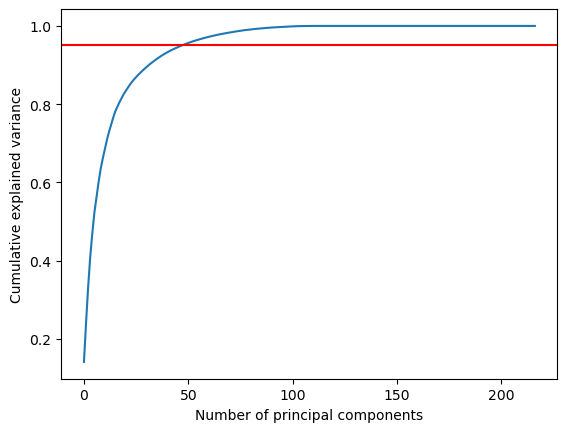

In [14]:
import matplotlib.pyplot as plt

# Determine explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Determine cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create a line plot to visualize the cumulative explained variance
plt.plot(range(217), cumulative_explained_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')

# Draw a horizontal line at y=0.95
plt.axhline(y=0.95, color='r', linestyle='-')

plt.show()

In [15]:
X.shape

(1034, 217)

In [16]:
X.head()

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
157,0.456303,0.057004,0.154195,0.211641,0.268702,0.291582,0.031167,0.196256,0.194400,0.245334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.247762,0.042212,0.185546,0.235081,0.298430,0.208482,0.092267,0.249115,0.132864,0.236173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.156560,0.018330,0.256249,0.211792,0.345696,0.112106,0.093533,0.420832,0.211616,0.284079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.336002,0.118065,0.093144,0.267882,0.241159,0.173538,0.107533,0.251635,0.144512,0.194750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,0.292094,0.058651,0.343742,0.217756,0.147433,0.082756,0.021367,0.307674,0.143584,0.353380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a list to store the feature importances
important_features = []

# Initialize a variable to store the cumulative feature importance
cumulative_importance = 0

# Loop over the feature importances
for i in indices:
    # Get the current feature importance
    importance = importances[i]
    # Add the current feature importance to the cumulative feature importance
    cumulative_importance += importance
    # Append the current feature to the list of important features
    important_features.append(X.columns[i])
    # If the cumulative feature importance is greater than or equal to 0.95, break the loop
    if cumulative_importance >= 0.95:
        break

# Print the list of important features
print("Important features:", important_features)
print(len(important_features))

Important features: ['Gly', 'Tyr', 'Ser', 'Non-polar', 'Gln', 'Val', 'Phe', 'Pro', 'Aromatic', 'Polar', 'Cys', 'Asn', 'Basic', 'Arg', 'Leu', 'Asp', 'Acidic', 'Ile', 'Hydrophobicity', 'Met', 'Ala', 'Glu', 'Aliphatic', 'Tiny', 'Lys', 'Small', 'His', 'Charged', 'Thr', 'Trp', 'SignalP', 'Ngly', 'Thr_1', 'LowComplexityRegions', 'Trans_Helices', 'Ogly_T', 'NGLY_0', 'Tyr_1', 'Ser_1', 'THR1_0', 'Ogly_S', 'TransHel_0', 'LCR_0', 'NGLY_2']
44


In [19]:
# Create a new data frame with only the important features
df_important = pd.DataFrame(X, columns=important_features)

df_important.head()

,Gly,Tyr,Ser,Non-polar,Gln,Val,Phe,Pro,Aromatic,Polar,...,Trans_Helices,Ogly_T,NGLY_0,Tyr_1,Ser_1,THR1_0,Ogly_S,TransHel_0,LCR_0,NGLY_2
157,0.291582,0.029089,0.212071,0.723220,0.023656,0.520528,0.268702,0.105875,0.209358,0.276780,...,0.0,0.000000,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
193,0.208482,0.096880,0.157020,0.659377,0.045549,0.422130,0.298430,0.130645,0.339111,0.340623,...,0.0,0.000000,1.0,0.022222,0.0,1.0,0.0,1.0,1.0,0.0
251,0.112106,0.074822,0.216854,0.572087,0.042613,0.308296,0.345696,0.085762,0.342275,0.427913,...,0.0,0.000609,0.0,0.044444,0.0,0.0,0.0,1.0,0.0,0.0
509,0.173538,0.060200,0.213957,0.650897,0.032668,0.393539,0.241159,0.186754,0.298062,0.349103,...,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.0
342,0.082756,0.119653,0.201389,0.672478,0.051929,0.442022,0.147433,0.177491,0.197430,0.327522,...,0.0,0.000000,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.0


In [20]:
df_important.shape

(1034, 44)

In [21]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_important, y, test_size=0.3, random_state=42)

# Convert the training set and test set to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()

# Convert the training set and test set to PyTorch datasets
train_dataset = TensorDataset(X_train_tensor)
test_dataset = TensorDataset(X_test_tensor)

# Create data loaders for the training set and test set
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [22]:
def train_stacked_autoencoder(model, train_dataloader, test_dataloader, num_epochs):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()

    for epoch in range(num_epochs):
        for i, (x,) in enumerate(train_dataloader):
            # Pass the input through the model
            reconstruction = model(x)

            # Calculate the reconstruction loss
            reconstruction_loss = loss_fn(reconstruction, x)

            # Zero the gradients
            optimizer.zero_grad()

            # Perform backpropagation and optimization
            reconstruction_loss.backward()
            optimizer.step()

        # Evaluate the model on the test data
        test_loss = 0
        with torch.no_grad():
            for i, (x_test,) in enumerate(test_dataloader):
                # Pass the test input through the model
                test_reconstruction = model(x_test)

                # calculate the test reconstruction loss
                test_loss += loss_fn(test_reconstruction, x_test).item()
        test_loss /= len(test_dataloader)
        print("Epoch {}: Train Loss: {:.4f} Test Loss: {:.4f}".format(epoch+1, reconstruction_loss.item(), test_loss))

In [157]:
class StackedAutoEncoder3(nn.Module):
    def __init__(self):
        super(StackedAutoEncoder3, self).__init__()

        # Encoder layers
        self.encoder_layers = nn.Sequential(
            nn.Linear(44, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        
        # Decoder layers
        self.decoder_layers = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 44),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder_layers(x)
        x = self.decoder_layers(x)
        return x

In [140]:
# class StackedAutoEncoder3(nn.Module):
#     def __init__(self):
#         super(StackedAutoEncoder3, self).__init__()

#         # Encoder layers
#         self.encoder_layers = nn.Sequential(
#             nn.Linear(44, 200),
#             nn.ReLU(),
#             nn.Linear(200, 100),
#             nn.ReLU(),
#             nn.Linear(100, 50),
#             nn.ReLU(),
#             nn.Linear(50, 25),
#             nn.ReLU(),
            
#         )
        
#         # Decoder layers
#         self.decoder_layers = nn.Sequential(
#             nn.Linear(25, 50),
#             nn.ReLU(),
#             nn.Linear(50, 100),
#             nn.ReLU(),
#             nn.Linear(100, 200),
#             nn.ReLU(),
#             nn.Linear(200, 44),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.encoder_layers(x)
#         x = self.decoder_layers(x)
#         return x

In [159]:
vae = VAE()
train_stacked_autoencoder(vae, train_dataloader, test_dataloader, num_epochs=50)

TypeError: __init__() missing 3 required positional arguments: 'input_dim', 'hidden_dim', and 'latent_dim'

In [98]:
class StackedAutoEncoder4(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_p):
        super().__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout_p = dropout_p
        
        self.encoder_layers = nn.ModuleList()
        self.decoder_layers = nn.ModuleList()
        
        for i in range(num_layers):
            self.encoder_layers.append(nn.Linear(input_size if i == 0 else hidden_size, hidden_size))
            self.encoder_layers.append(nn.ReLU())
            self.encoder_layers.append(nn.Dropout(p=dropout_p))
            self.decoder_layers.append(nn.Linear(hidden_size, input_size if i == num_layers-1 else hidden_size))
            self.decoder_layers.append(nn.ReLU())
            self.decoder_layers.append(nn.Dropout(p=dropout_p))
        
    def forward(self, x):
        encoded = x
        for i in range(0, len(self.encoder_layers), 3):
            encoded = self.encoder_layers[i](encoded)
            encoded = self.encoder_layers[i+1](encoded)
            encoded = self.encoder_layers[i+2](encoded)
        decoded = encoded
        for i in range(0, len(self.decoder_layers), 3):
            decoded = self.decoder_layers[i](decoded)
            decoded = self.decoder_layers[i+1](decoded)
            decoded = self.decoder_layers[i+2](decoded)
        return decoded



NameError: name 'lily' is not defined

In [211]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim*2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        mu, log_var = x[:,:self.latent_dim], x[:,self.latent_dim:]
        z = self.reparameterize(mu, log_var)
        x = self.decoder(z)
        return x, mu, log_var
    
    def reparameterize(self, mu, log_var):
        std = log_var.mul(0.5).exp_()
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)
    
    def decode(self, z):
        return self.decoder(z)

input_dim = 44
hidden_dim = 32
latent_dim = 10

vae = VAE(input_dim, hidden_dim, latent_dim)


In [212]:
def train_variational_autoencoder(model, train_dataloader, test_dataloader, num_epochs):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()

    for epoch in range(num_epochs):
        for i, (x,) in enumerate(train_dataloader):
            # Pass the input through the model
            reconstruction,_,_ = model(x)

            # Calculate the reconstruction loss
            reconstruction_loss = loss_fn(reconstruction, x)

            # Zero the gradients
            optimizer.zero_grad()

            # Perform backpropagation and optimization
            reconstruction_loss.backward()
            optimizer.step()

        # Evaluate the model on the test data
        test_loss = 0
        with torch.no_grad():
            for i, (x_test,) in enumerate(test_dataloader):
                # Pass the test input through the model
                test_reconstruction,_,_ = model(x_test)

                # calculate the test reconstruction loss
                test_loss += loss_fn(test_reconstruction, x_test)
    print("Test Loss:", test_loss)


In [207]:
class EnhancedVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3, latent_dim):
        super().__init__()
        
        # Encoder layers
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.fc4 = nn.Linear(hidden_dim_3, latent_dim)
        
        # Decoder layers
        self.fc5 = nn.Linear(latent_dim, hidden_dim_3)
        self.fc5 = nn.Linear(hidden_dim_3, hidden_dim_2)
        self.fc6 = nn.Linear(hidden_dim_2, hidden_dim_1)
        self.fc7 = nn.Linear(hidden_dim_1, input_dim)
        

    def encoder(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        return self.fc4(h3)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decoder(self, z):
        h4 = F.relu(self.fc5(z))
        h5 = F.relu(self.fc6(h4))
        h6 = F.relu(self.fc7(h5))
        h7 = F.relu(self.fc8(h6))
        return h7

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        h6 = self.decoder(z)
        h7 = F.relu(self.fc7(h6))
        h8 = F.relu(self.fc8(h7))
        print(x.shape)
        print(self.fc1.weight.shape)
        return h8, mu, logvar




input_dim = 44
hidden_dim_1 = 36
hidden_dim_2 = 24
hidden_dim_3 = 18
latent_dim = 12

In [209]:
evae = EnhancedVAE(input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3,
latent_dim)

In [213]:
train_variational_autoencoder(vae, train_dataloader, test_dataloader, num_epochs=50)

Test Loss: tensor(0.0362)


In [205]:
print(x.shape)
print(self.fc1.weight.shape)


torch.Size([23, 44])


NameError: name 'self' is not defined

In [202]:
train_variational_autoencoder(evae, train_dataloader, test_dataloader, num_epochs=50)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x44 and 32x32)

In [123]:
print(type(train_dataloader))


<class 'torch.utils.data.dataloader.DataLoader'>


In [124]:
print(enumerate(train_dataloader))

In [125]:
print(type(test_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [214]:
compressed_train_data = []
for i, x in enumerate(train_dataloader):
    x = x[0] # extract the tensor from the list
    x = x.view(x.size(0), -1)
    compressed_train = vae.encoder(x)
    compressed_train_data.append(compressed_train)


In [215]:
compressed_test_data = []
for i, x in enumerate(test_dataloader):
    x = x[0] # extract the tensor from the list
    x = x.view(x.size(0), -1)
    compressed_test = vae.encoder(x)
    compressed_test_data.append(compressed_test)

In [216]:
print(compressed_train_data)

[tensor([[-1.8163e+00,  7.4972e-02,  3.8653e+00,  2.0071e-01, -1.7491e-01,
         -1.7873e+00,  2.1773e+00, -5.8961e-01,  2.2703e+00,  3.0673e+00,
         -9.8346e+00, -9.3438e+00, -8.8887e+00, -8.8949e+00, -9.4865e+00,
         -9.6914e+00, -8.6642e+00, -9.1642e+00, -9.5811e+00, -7.8275e+00],
        [-1.8321e+00, -1.9830e+00,  1.4775e+00, -9.4113e-01, -2.3727e-01,
         -1.5625e+00,  2.6479e+00, -9.0992e-01,  1.8577e+00,  1.4155e+00,
         -8.9563e+00, -8.1415e+00, -8.5560e+00, -8.3185e+00, -8.2490e+00,
         -9.1771e+00, -8.4758e+00, -8.1967e+00, -8.3847e+00, -7.5538e+00],
        [-2.2567e+00, -8.0916e-01,  2.8122e+00, -1.1053e+00, -3.1822e-01,
         -6.7822e-01,  2.3034e+00, -1.4033e+00,  2.3297e+00,  1.9784e+00,
         -9.3574e+00, -8.7516e+00, -8.4449e+00, -8.7178e+00, -8.7515e+00,
         -9.2780e+00, -8.3011e+00, -8.5499e+00, -8.7716e+00, -7.5654e+00],
        [-7.6942e-01, -4.4765e-01,  3.2531e+00, -9.6432e-01, -7.8573e-01,
         -9.6126e-01,  1.2800e+00,

In [217]:
print(compressed_test_data)

[tensor([[-1.5164e+00, -5.4269e-01,  3.0130e+00,  1.0289e-01, -1.0077e+00,
         -1.9000e+00,  1.1516e+00, -4.3837e-02,  8.7136e-01,  2.7784e+00,
         -8.4246e+00, -8.0207e+00, -7.8875e+00, -7.5714e+00, -8.0110e+00,
         -8.2233e+00, -7.7922e+00, -8.0845e+00, -8.3955e+00, -6.6372e+00],
        [-1.7354e+00,  1.2404e-01,  3.7283e+00,  2.9815e-01, -1.4564e-01,
         -1.7460e+00,  2.0915e+00, -6.0402e-01,  2.3255e+00,  2.7471e+00,
         -9.2933e+00, -8.8615e+00, -8.4563e+00, -8.5022e+00, -9.0560e+00,
         -9.2677e+00, -8.1546e+00, -8.7440e+00, -9.1208e+00, -7.3458e+00],
        [-1.9094e+00,  4.1222e-02,  3.7915e+00,  3.2419e-01, -3.8610e-02,
         -1.7365e+00,  2.2090e+00, -5.8824e-01,  2.1836e+00,  3.0658e+00,
         -9.7460e+00, -9.2939e+00, -8.7846e+00, -8.8023e+00, -9.4276e+00,
         -9.5765e+00, -8.6412e+00, -9.0260e+00, -9.5342e+00, -7.8107e+00],
        [-2.8810e+00,  2.2612e-02,  3.2390e+00, -6.9875e-01, -3.0993e-01,
         -1.6341e+00,  2.4306e+00,

In [218]:
import xgboost as xgb
from xgboost import XGBClassifier

In [219]:

compressed_train_data_np = [c.detach().numpy() for c in compressed_train_data]
compressed_train_data_np = np.concatenate(compressed_train_data_np)


In [220]:
compressed_test_data_np = [c.detach().numpy() for c in compressed_test_data]
compressed_test_data_np = np.concatenate(compressed_test_data_np)

In [221]:
xgb_model = XGBClassifier()
xgb_model.fit(compressed_train_data_np, y_train)

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [222]:
predictions = xgb_model.predict(compressed_test_data_np)


In [223]:
print(len(predictions))

311


In [224]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)


array([[75, 89],
       [74, 73]])

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


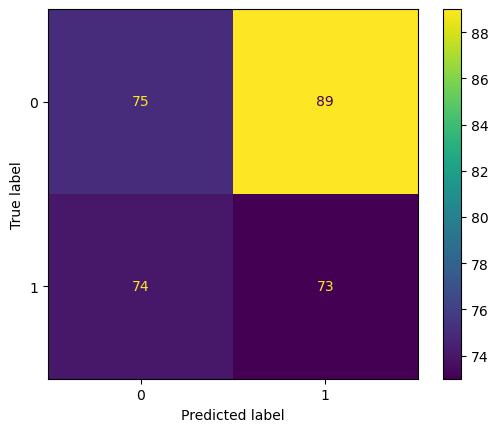

In [225]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_model, compressed_test_data_np, y_test)


In [156]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set up the biased SVM with a linear kernel
biased_svm = SVC(kernel='linear', class_weight='balanced')

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Use GridSearchCV to find the best parameters for the SVM
grid = GridSearchCV(biased_svm, param_grid, verbose=3)
grid.fit(compressed_train_data_np, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found: ",grid.best_params_)

# Use the best parameters to train the final model
final_model = SVC(kernel='linear', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], class_weight='balanced')
final_model.fit(compressed_train_data_np, y_train)

# Use the final model to make predictions on the test data
predictions = final_model.predict(compressed_test_data_np)

# Evaluate the model's performance on the test data
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.476 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.448 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.524 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.500 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.476 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.448 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.524 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.476 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

KeyboardInterrupt: 

In [53]:
# recombine the data
compressed_data = np.concatenate((compressed_train_data_np, compressed_test_data_np), axis=0)
labels = np.hstack((y_train, y_test))
combined_data = list(zip(compressed_data, labels))


In [54]:
df2 = pd.DataFrame(combined_data)
df2.head()

,0,1
0,"[6.5755234, 5.571748, 3.6578317, 4.271656, 5.3...",1
1,"[6.3379602, 6.768138, 8.637618, 2.094925, 2.45...",1
2,"[8.857427, 7.394251, 4.2053165, 5.5321593, 5.2...",1
3,"[13.153353, 10.80303, 6.975997, 8.395071, 8.82...",1
4,"[6.174841, 4.07103, 9.584067, 0.44837558, -0.1...",1


In [58]:
df2.columns = ['compressed_data', 'labels']

In [59]:
df2.head()

,compressed_data,labels
0,"[6.5755234, 5.571748, 3.6578317, 4.271656, 5.3...",1
1,"[6.3379602, 6.768138, 8.637618, 2.094925, 2.45...",1
2,"[8.857427, 7.394251, 4.2053165, 5.5321593, 5.2...",1
3,"[13.153353, 10.80303, 6.975997, 8.395071, 8.82...",1
4,"[6.174841, 4.07103, 9.584067, 0.44837558, -0.1...",1


In [62]:
df.shape

(5893, 218)

In [60]:
df2.columns

Index(['compressed_data', 'labels'], dtype='object')

In [61]:
label_sum = df2["labels"].sum()
print(label_sum)

5376


In [66]:
df_0 = df2[df2['labels'] == 0].sample(n=500)
df_1 = df2[df2['labels'] == 1].sample(n=500)


In [69]:
df_subset = pd.concat([df_0, df_1])
df_subset.head()

,compressed_data,labels
2408,"[10.139181, 8.281476, 7.068696, 4.704192, 1.94...",0
1937,"[10.06857, 8.430594, 6.7130384, 4.882074, 2.21...",0
1211,"[10.330197, 9.356737, 7.6409583, 5.312265, 4.0...",0
5024,"[6.01475, 4.5671988, 9.774903, 1.60197, 6.0624...",0
2424,"[11.331438, 9.513185, 12.187493, 5.207986, 9.4...",0


In [70]:
X_sub = df_subset['compressed_data']
y_sub = df_subset['labels']

In [71]:
X_train_5050, X_test_5050, y_train_5050, y_test_5050 = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='labels', ylabel='count'>

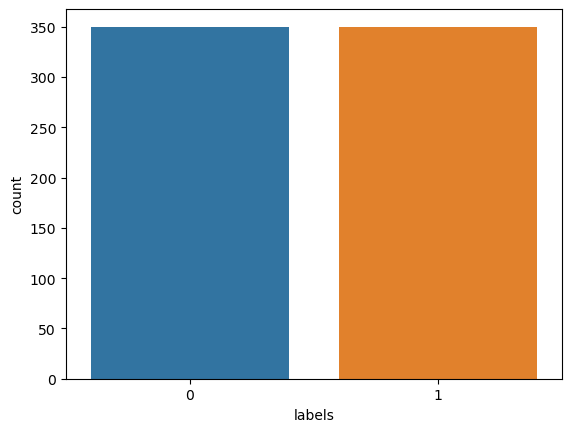

In [74]:
import seaborn as sns

sns.countplot(x=y_train_5050)


<AxesSubplot:xlabel='labels', ylabel='count'>

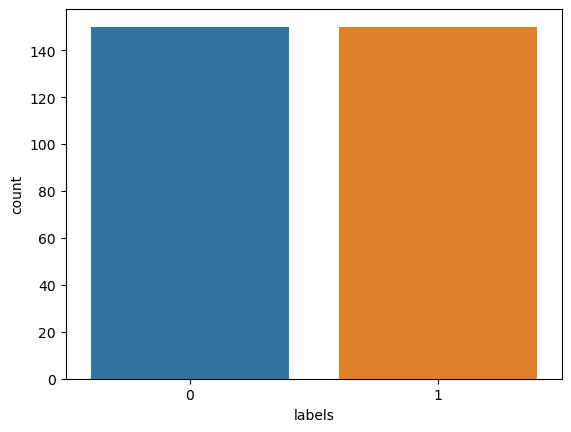

In [75]:
sns.countplot(x=y_test_5050)